In [ ]:
import pandas as pd
data = pd.read_csv("product detail table.csv")

data

In [19]:
# Phan tich du lieu
quantities = data["StockQuantity"]
quantities.sum()
quantities.mean()

prices = data["Price"]
prices.mean()
prices.median()

# Them moi cot du lieu
data["Inventory Value"] = data["Price"] * data["StockQuantity"]
data.describe()

,ProductID,Price,ProductGroupID,StockQuantity,ReorderLevel,Inventory Value
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,533.190000,5.500000,121.900000,18.700000,44362.781000
std,14.57738,445.954331,2.901442,75.436756,11.641323,22583.324483
min,1.00000,89.990000,1.000000,20.000000,5.000000,11699.100000
25%,13.25000,199.990000,3.000000,70.000000,10.000000,29997.375000
50%,25.50000,324.990000,5.500000,100.000000,15.000000,42498.400000
75%,37.75000,799.990000,8.000000,150.000000,25.000000,55749.350000
max,50.00000,1999.990000,10.000000,300.000000,50.000000,104998.500000


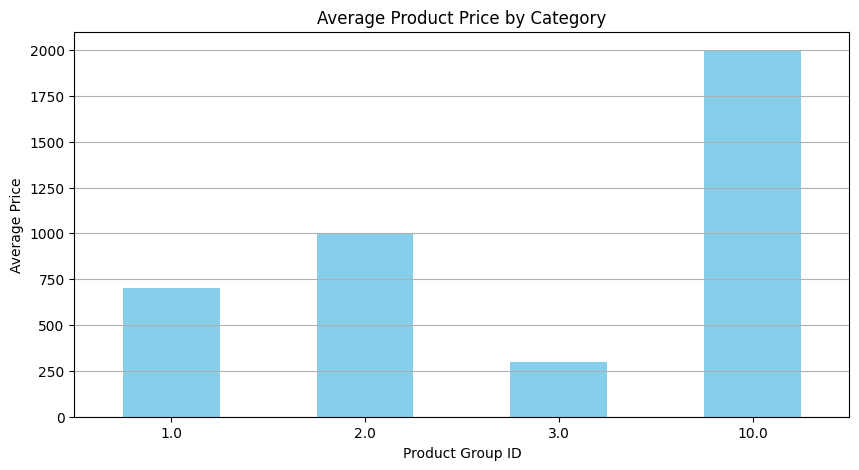

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


# Create DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Group by ProductGroupID and calculate average price
avg_price = df.groupby('ProductGroupID')['Price'].mean()

# Bar chart
plt.figure(figsize=(10, 5))
avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Product Price by Category')
plt.xlabel('Product Group ID')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

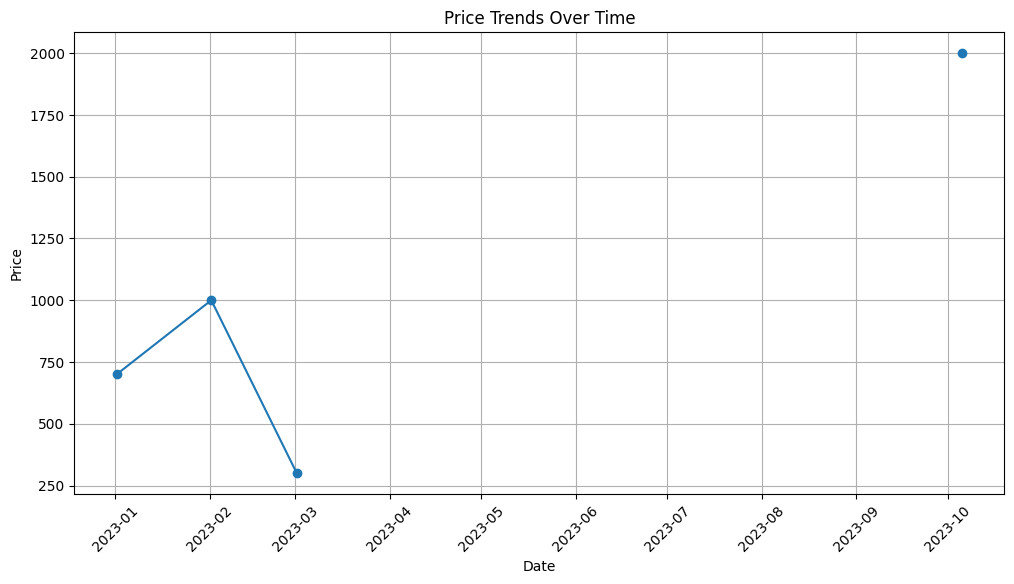

In [54]:
# Convert CreatedAt to datetime
df['CreatedAt'] = pd.to_datetime(df['CreatedAt'])

# Line chart
plt.figure(figsize=(12, 6))
plt.plot(df['CreatedAt'], df['Price'], marker='o', linestyle='-')
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid()
plt.show()

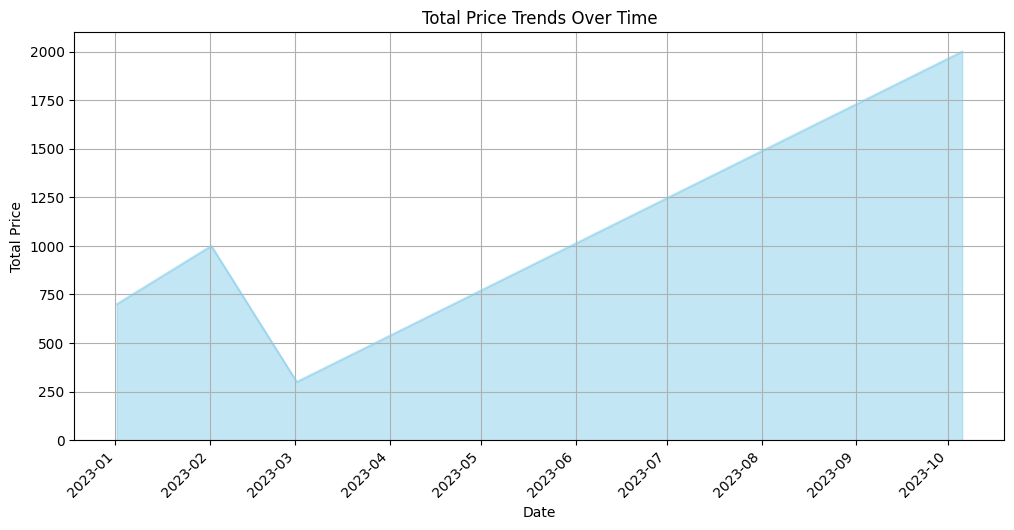

In [56]:
# Area Chart of Price Trends Over Time
price_trend = df.groupby('CreatedAt')['Price'].sum()

plt.figure(figsize=(12, 6))
price_trend.plot(kind='area', color='skyblue', alpha=0.5)
plt.title('Total Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Mean Squared Error: 1405835.559276422
R-squared: 0.9893698634459249


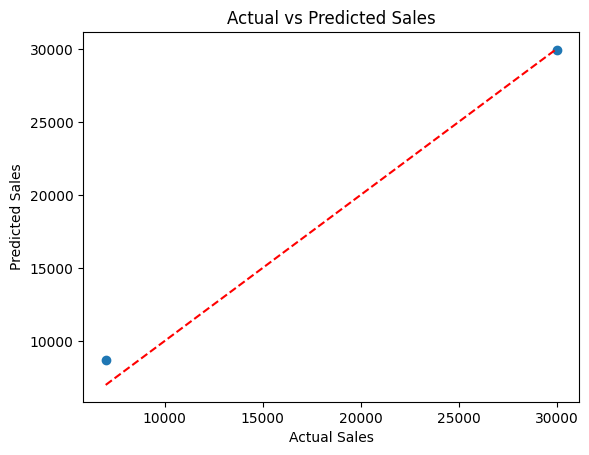

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample data creation
data = {
    'Price': [699.99, 999.99, 299.99, 199.99, 149.99, 799.99, 399.99, 129.99, 199.99, 899.99],
    'StockQuantity': [150, 80, 200, 250, 300, 60, 120, 90, 110, 75],
    'MarketingSpend': [5000, 7000, 2000, 1500, 1000, 6000, 3000, 800, 1200, 4500],
    'Sales': [20000, 30000, 15000, 10000, 8000, 25000, 15000, 5000, 7000, 28000]
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['Price', 'StockQuantity', 'MarketingSpend']]
y = df['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()



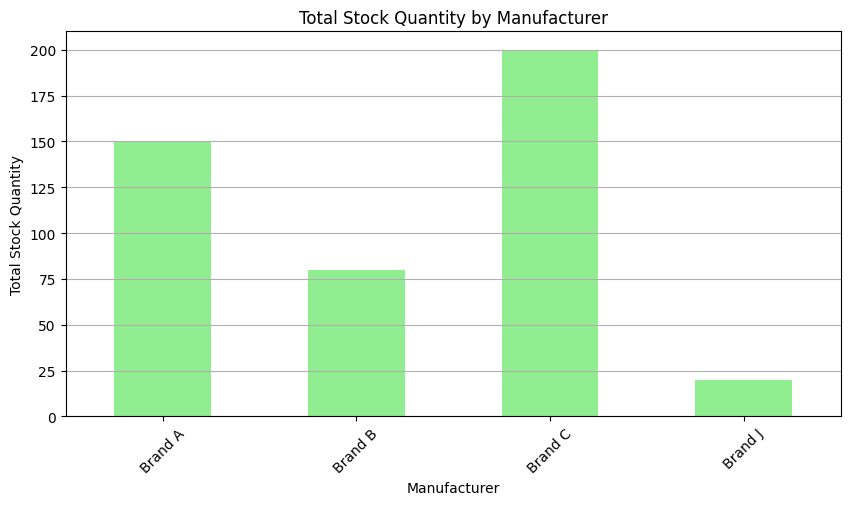

In [55]:
# Total Stock Quantity by Manufacturer
stock_by_manufacturer = df.groupby('Manufacturer')['StockQuantity'].sum()

plt.figure(figsize=(10, 5))
stock_by_manufacturer.plot(kind='bar', color='lightgreen')
plt.title('Total Stock Quantity by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Total Stock Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<Figure size 1200x600 with 0 Axes>

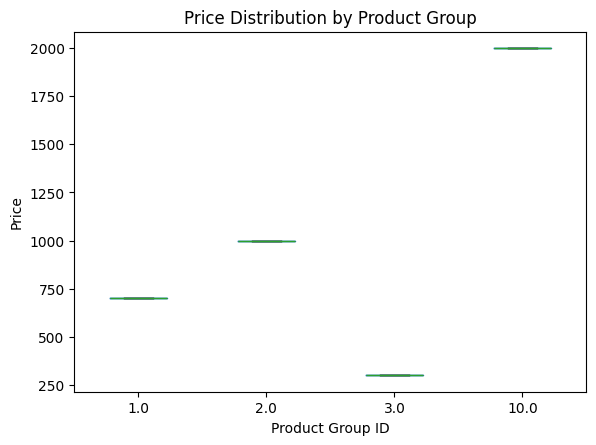

In [51]:
# Box Plot of Prices by Product Group
plt.figure(figsize=(12, 6))
df.boxplot(column='Price', by='ProductGroupID', grid=False)
plt.title('Price Distribution by Product Group')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Product Group ID')
plt.ylabel('Price')
plt.show()

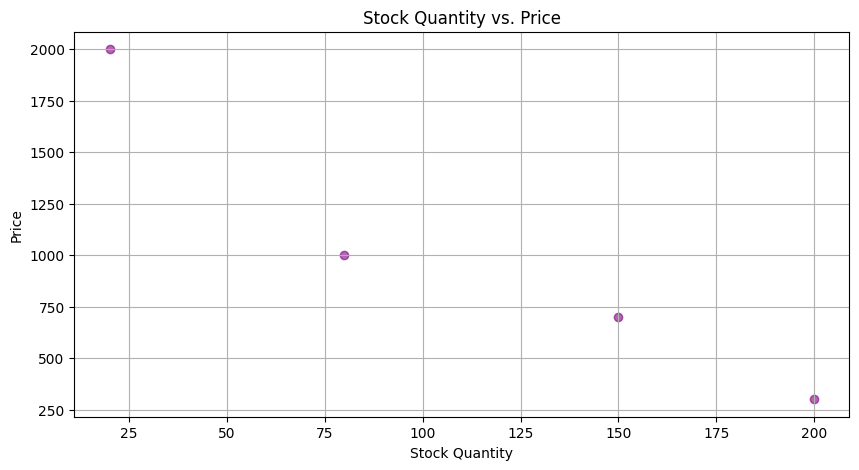

In [50]:
import matplotlib.pyplot as plt
# Scatter Plot of Stock Quantity vs. Price
plt.figure(figsize=(10, 5))
plt.scatter(df['StockQuantity'], df['Price'], color='purple', alpha=0.6)
plt.title('Stock Quantity vs. Price')
plt.xlabel('Stock Quantity')
plt.ylabel('Price')
plt.grid()
plt.show()

In [ ]:
data = data.drop_duplicates()
data

In [ ]:
df_cleaned=data.dropna()
df_cleaned